In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error
import time

In [2]:
Train = pd.read_csv('Dcmd_dataset.csv')

In [3]:
x = Train.iloc[:,:-1].values
y = Train.iloc[:,-1].values

In [4]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [5]:
scaler = StandardScaler()
lr = LinearRegression()
pipe = make_pipeline(scaler,lr)

In [6]:
initial = time.time()

In [7]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [8]:
print(time.time()-initial)

0.04775881767272949


In [9]:
y_pred_test=pipe.predict(X_test)

In [10]:
y_pred_train=pipe.predict(X_train)

In [11]:
print(r2_score(y_test,y_pred_test))
print(mean_squared_error(y_test,y_pred_test))
print(mean_absolute_percentage_error(y_test,y_pred_test))

0.9470339266450571
0.016752506926251482
0.03363165608846324


In [12]:
print(r2_score(y_train,y_pred_train))
print(mean_squared_error(y_train,y_pred_train))
print(mean_absolute_percentage_error(y_train,y_pred_train))

0.9561969755027739
0.013769929427516446
0.026660994612899582


In [13]:
df = pd.DataFrame(X_train, columns = ['Feed Temp', 'Feed Flow' ,'Concentration', 'Permiate Temp'])
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = df.columns
lreg_coefficient['   Coefficient Estimate'] = pd.Series(lr.coef_)
print(lreg_coefficient)

         Columns     Coefficient Estimate
0      Feed Temp                 0.375906
1      Feed Flow                 0.340830
2  Concentration                -0.208103
3  Permiate Temp                -0.158619


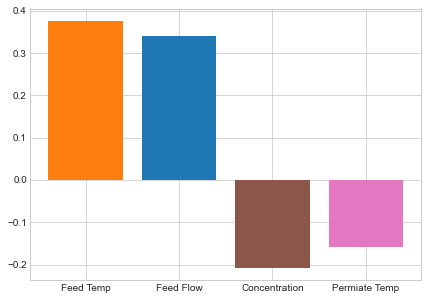

In [22]:
fig, ax = plt.subplots(figsize =(7, 5))
color =['tab:orange', 'tab:blue','tab:brown', 'tab:pink']
ax.bar(lreg_coefficient["Columns"],lreg_coefficient['   Coefficient Estimate'],color = color)
plt.style.use('seaborn-white')
plt.show()

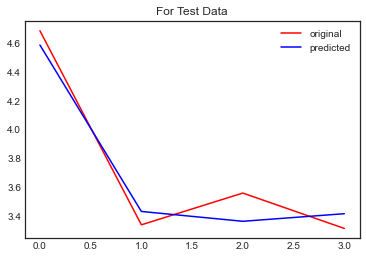

In [15]:
plt.style.use('seaborn-white')
x_ax = range(len(y_test))
plt.plot(x_ax,y_test,label='original',c='red')
plt.plot(x_ax,y_pred_test,label='predicted',c='blue')
plt.title("For Test Data")
plt.legend()
plt.show()

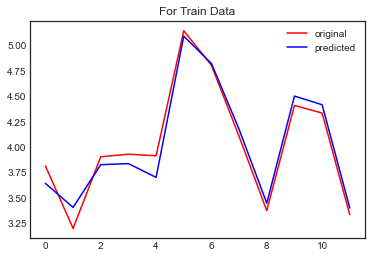

In [16]:
plt.style.use('seaborn-white')
x_ax = range(len(y_train))
plt.plot(x_ax,y_train,label='original',c='red')
plt.plot(x_ax,y_pred_train,label='predicted',c='blue')
plt.title("For Train Data")
plt.legend()
plt.show()

In [17]:
RD = ((y_pred_train-y_train)*100)/y_train
RD1 = ((y_pred_test-y_test)*100)/y_test

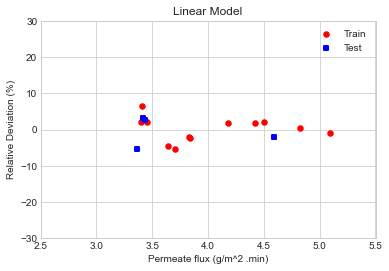

In [21]:
plt.xlim(2.5,5.5)
plt.ylim(-30,30)
plt.scatter(y_pred_train,RD,c="red",marker='o',linewidths=2,s=20,label='Train')
plt.scatter(y_pred_test,RD1,c="blue",marker='s',linewidths=2,s=20,label='Test')
plt.xlabel("Permeate flux (g/m^2 .min)")
plt.ylabel("Relative Deviation (%)")
plt.title("Linear Model")
plt.legend()
plt.style.use('seaborn-whitegrid')
plt.show()

In [19]:
np.set_printoptions(precision=2)
print("Train data comparasion")
print("\n\n\n FT     FF   Con   PT   predicted Actual")
print(np.concatenate((X_train,y_pred_train.reshape(len(y_pred_train),1),y_train.reshape(len(y_train),1)),1))

Train data comparasion



 FT     FF   Con   PT   predicted Actual
[[65.    1.   20.   15.    3.64  3.81]
 [65.    0.8  15.   18.    3.41  3.2 ]
 [70.    0.8  20.   12.    3.83  3.9 ]
 [60.    1.2  20.    9.    3.84  3.93]
 [60.    1.    5.   18.    3.7   3.92]
 [70.    1.4   5.   15.    5.09  5.14]
 [65.    1.4  10.    9.    4.82  4.8 ]
 [60.    1.4  15.   12.    4.18  4.11]
 [55.    0.8   5.    9.    3.45  3.38]
 [70.    1.2  10.   18.    4.5   4.41]
 [70.    1.   15.    9.    4.42  4.33]
 [55.    1.4  20.   18.    3.4   3.33]]


In [20]:
np.set_printoptions(precision=2)
print("Test data comparasion")
print("\n\n\n FT     FF   Con   PT   predicted Actual")
print(np.concatenate((X_test,y_pred_test.reshape(len(y_pred_test),1),y_test.reshape(len(y_test),1)),1))

Test data comparasion



 FT     FF   Con   PT   predicted Actual
[[65.    1.2   5.   12.    4.59  4.68]
 [55.    1.   10.   12.    3.43  3.34]
 [60.    0.8  10.   15.    3.36  3.56]
 [55.    1.2  15.   15.    3.42  3.31]]
